In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

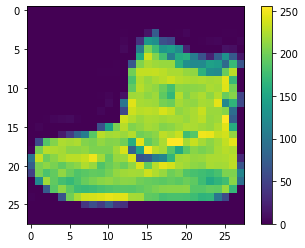

In [9]:
plt.figure() # 빈도화지를 펼치기
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images= test_images/255.0

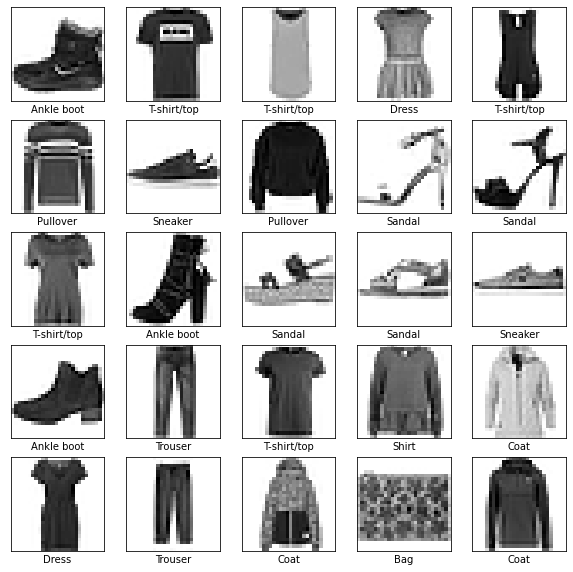

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), #첫번째 dense는 이미지 특성을 몇개로 추릴지 보는 것
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4995 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3725 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2549 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2460 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) #1은 기본값,  2는 프로그래스 바가 안보임
print('test accuracy:, test_acc')

313/313 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8805
test accuracy:, test_acc


In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.9645234e-09, 1.2534800e-10, 4.7934084e-10, 6.3636677e-14,
       9.6053308e-09, 1.2553937e-02, 3.3049641e-09, 1.0406626e-02,
       8.9007788e-09, 9.7703940e-01], dtype=float32)

In [19]:
len(predictions)

10000

In [20]:
sum(predictions[0])  #확률이므로 다 더하면 1에 수렴한다.

0.9999999843334788

In [21]:
np.argmax(predictions[0])

9

In [22]:
np.argmin(predictions[0])

3

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

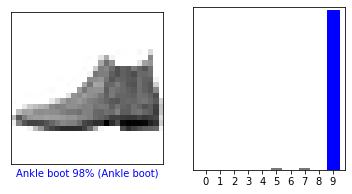

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

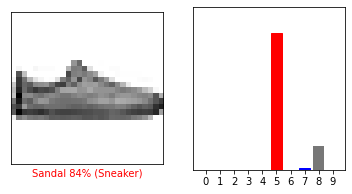

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()  #틀린 것 빨간 바가 올라옴

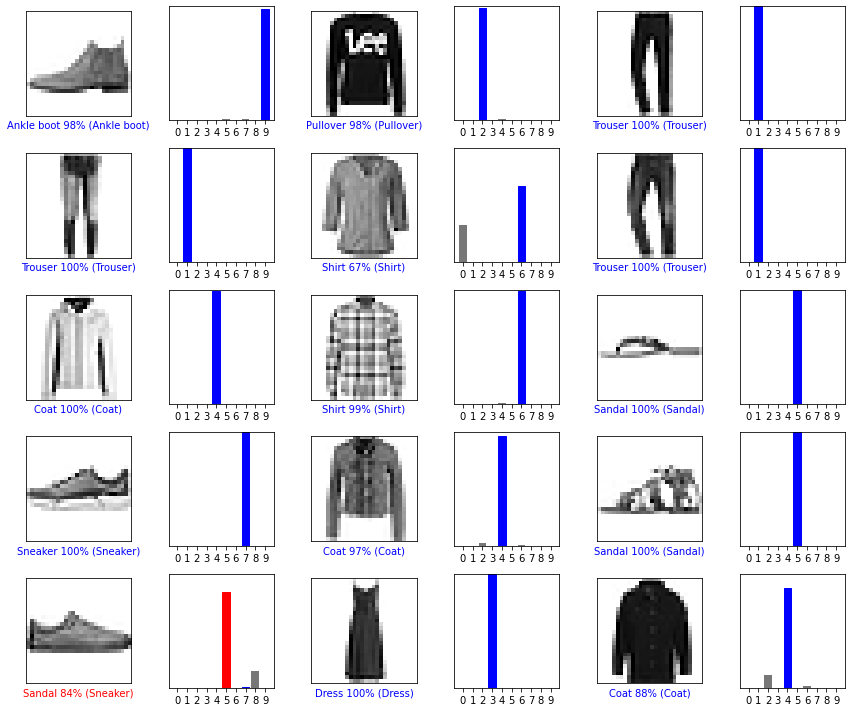

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

#batch형태로 정상적으로 작동을 한다.

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.24253997e-05 7.55908481e-17 9.84631896e-01 1.37695714e-11
  1.52216079e-02 3.49479723e-13 1.14075156e-04 8.26808216e-18
  1.50255988e-10 2.37473882e-15]]


predictions_single = probability_model.predict(img)

print(predictions_single)

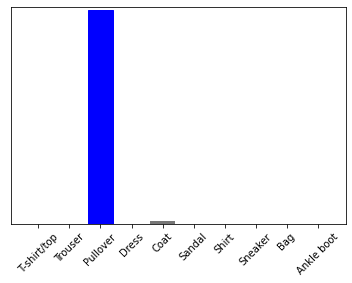

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0]) #argmax: 최대값

2